# 员工离职率预测


* 主要字段说明如下：
1. Age：员工年龄
2. Attrition：员工是否已经离职，1表示已经离职，2表示未离职，这是目标预测值；
3. BusinessTravel：商务差旅频率，Non-Travel表示不出差，Travel_Rarely表示不经常出差，Travel_Frequently表示经常出差；
4. Department：员工所在部门，Sales表示销售部，Research & Development表示研发部，Human Resources表示人力资源部；
5. DistanceFromHome：公司跟家庭住址的距离，从1到29，1表示最近，29表示最远；
6. Education：员工的教育程度，从1到5，5表示教育程度最高；
7. EducationField：员工所学习的专业领域，Life Sciences表示生命科学，Medical表示医疗，Marketing表示市场营销，Technical Degree表示技术学位，Human Resources表示人力资源，Other表示其他；
8. EmployeeNumber：员工号码；
9. EnvironmentSatisfaction：员工对于工作环境的满意程度，从1到4，1的满意程度最低，4的满意程度最高；
10. Gender：员工性别，Male表示男性，Female表示女性；
11. JobInvolvement：员工工作投入度，从1到4，1为投入度最低，4为投入度最高；
12. JobLevel：职业级别，从1到5，1为最低级别，5为最高级别；
13. JobRole：工作角色：Sales Executive是销售主管，Research Scientist是科学研究员，Laboratory Technician实验室技术员，Manufacturing Director是制造总监，Healthcare Representative是医疗代表，Manager是经理，Sales Representative是销售代表，Research Director是研究总监，Human Resources是人力资源；
14. JobSatisfaction：工作满意度，从1到4，1代表满意程度最低，4代表满意程度最高；
15. MaritalStatus：员工婚姻状况，Single代表单身，Married代表已婚，Divorced代表离婚；
16. MonthlyIncome：员工月收入，范围在1009到19999之间；
17. NumCompaniesWorked：员工曾经工作过的公司数；
18. Over18：年龄是否超过18岁；
19. OverTime：是否加班，Yes表示加班，No表示不加班；
20. PercentSalaryHike：工资提高的百分比；
21. PerformanceRating：绩效评估；
22. RelationshipSatisfaction：关系满意度，从1到4，1表示满意度最低，4表示满意度最高；
23. StandardHours：标准工时；
24. StockOptionLevel：股票期权水平；
25. TotalWorkingYears：总工龄；
26. TrainingTimesLastYear：上一年的培训时长，从0到6，0表示没有培训，6表示培训时间最长；
27. WorkLifeBalance：工作与生活平衡程度，从1到4，1表示平衡程度最低，4表示平衡程度最高；
28. YearsAtCompany：在目前公司工作年数；
29. YearsInCurrentRole：在目前工作职责的工作年数
30. YearsSinceLastPromotion：距离上次升职时长
31. YearsWithCurrManager：跟目前的管理者共事年数；


In [127]:
import warnings
warnings.filterwarnings('ignore')

In [128]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
%matplotlib inline

In [129]:
file=open("D:/BaiduYunDownload/员工离职预测训练赛/pfm_train.csv", encoding='utf-8')
data=pd.read_csv(file, encoding='utf-8')


file=open("D:/BaiduYunDownload/员工离职预测训练赛/pfm_test.csv", encoding='utf-8')
test=pd.read_csv(file)
file.close()

In [130]:
data.head(5)

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,37,0,Travel_Rarely,Research & Development,1,4,Life Sciences,77,1,Male,...,3,80,1,7,2,4,7,5,0,7
1,54,0,Travel_Frequently,Research & Development,1,4,Life Sciences,1245,4,Female,...,1,80,1,33,2,1,5,4,1,4
2,34,1,Travel_Frequently,Research & Development,7,3,Life Sciences,147,1,Male,...,4,80,0,9,3,3,9,7,0,6
3,39,0,Travel_Rarely,Research & Development,1,1,Life Sciences,1026,4,Female,...,3,80,1,21,3,3,21,6,11,8
4,28,1,Travel_Frequently,Research & Development,1,3,Medical,1111,1,Male,...,1,80,2,1,2,3,1,0,0,0


In [131]:
#是否有null值
print(data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64


In [132]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null object
Department                  1100 non-null object
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null object
EmployeeNumber              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null object
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null object
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null object
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
Over18                      1100 non-null object
OverTime              

In [133]:
data.describe()

,Age,Attrition,DistanceFromHome,Education,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.0,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,36.999091,0.161818,9.427273,2.922727,1028.157273,2.725455,2.730909,2.054545,2.732727,6483.620909,...,2.696364,80.0,0.788182,11.221818,2.807273,2.746364,7.011818,4.207273,2.226364,4.123636
std,9.037230,0.368451,8.196694,1.022242,598.915204,1.098053,0.706366,1.107805,1.109731,4715.293419,...,1.095356,0.0,0.843347,7.825548,1.291514,0.701121,6.223093,3.618115,3.313830,3.597996
min,18.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,2.000000,2.000000,504.250000,2.000000,2.000000,1.000000,2.000000,2924.500000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,7.000000,3.000000,1026.500000,3.000000,3.000000,2.000000,3.000000,4857.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,15.000000,4.000000,1556.500000,4.000000,3.000000,3.000000,4.000000,8354.500000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,29.000000,5.000000,2065.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [134]:
#转化字段型变量

from sklearn.preprocessing import LabelEncoder

def asnumberic(src):
    for i in range(src.shape[1]):
        col_name=src.columns[i]
        dtype=src.dtypes[i]
        if dtype=='object':
            print(col_name,dtype)
            le=LabelEncoder()
            le.fit(np.unique(src[col_name]))
            le.get_params(deep=True)
            src[col_name]=le.transform(src[col_name])
            for j in range(np.max(src[col_name])+1):
                print(j,le.inverse_transform(j))
    return src

In [135]:
train=asnumberic(data)
t=asnumberic(test)

BusinessTravel object
0 Non-Travel
1 Travel_Frequently
2 Travel_Rarely
Department object
0 Human Resources
1 Research & Development
2 Sales
EducationField object
0 Human Resources
1 Life Sciences
2 Marketing
3 Medical
4 Other
5 Technical Degree
Gender object
0 Female
1 Male
JobRole object
0 Healthcare Representative
1 Human Resources
2 Laboratory Technician
3 Manager
4 Manufacturing Director
5 Research Director
6 Research Scientist
7 Sales Executive
8 Sales Representative
MaritalStatus object
0 Divorced
1 Married
2 Single
Over18 object
0 Y
OverTime object
0 No
1 Yes
BusinessTravel object
0 Non-Travel
1 Travel_Frequently
2 Travel_Rarely
Department object
0 Human Resources
1 Research & Development
2 Sales
EducationField object
0 Human Resources
1 Life Sciences
2 Marketing
3 Medical
4 Other
5 Technical Degree
Gender object
0 Female
1 Male
JobRole object
0 Healthcare Representative
1 Human Resources
2 Laboratory Technician
3 Manager
4 Manufacturing Director
5 Research Director
6 Research S

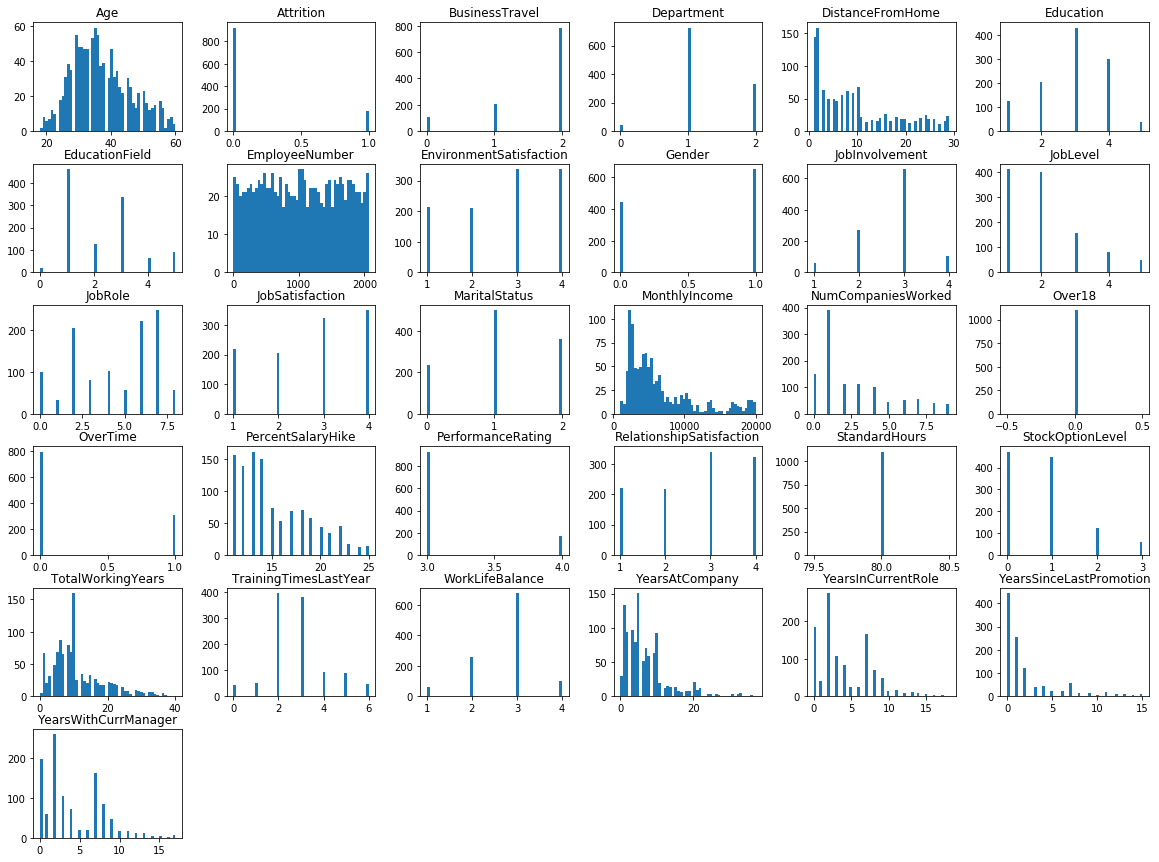

In [136]:
train.hist(figsize=(20,15), bins=50,grid=False)
plt.show()

In [137]:
train.columns

print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 31 columns):
Age                         1100 non-null int64
Attrition                   1100 non-null int64
BusinessTravel              1100 non-null int64
Department                  1100 non-null int64
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null int64
EmployeeNumber              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null int64
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null int64
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null int64
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
Over18                      1100 non-null int64
OverTime                    1

In [138]:


def getdummies(df, cols):
    for col in cols:
        dummies=pd.get_dummies(df[col], drop_first=False)
        dummies=dummies.add_prefix("{}#".format(col))
        df.drop(col, axis=1, inplace=True)
        df=df.join(dummies)
        return df

In [139]:

ordinal_cols=['Gender','BusinessTravel','Department']

t=getdummies(test, ordinal_cols)

t.head()

,Age,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,...,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender#0,Gender#1
0,40,0,1,9,4,4,1449,3,3,2,...,2,11,2,4,8,7,0,7,0,1
1,53,2,1,7,2,3,1201,4,3,5,...,1,26,6,3,7,7,4,7,1,0
2,42,2,1,2,4,4,477,1,2,2,...,0,14,6,3,1,0,0,0,0,1
3,34,1,0,11,3,1,1289,3,2,2,...,2,14,5,4,10,9,1,8,0,1
4,32,2,1,1,1,1,134,4,3,1,...,0,1,2,3,1,0,0,0,0,1


In [140]:
x=train.drop(['EmployeeNumber','Attrition','Over18','StandardHours'],1)
test=test.drop(['EmployeeNumber','Over18','StandardHours'], axis=1)

y=train['Attrition']
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 27 columns):
Age                         1100 non-null int64
BusinessTravel              1100 non-null int64
Department                  1100 non-null int64
DistanceFromHome            1100 non-null int64
Education                   1100 non-null int64
EducationField              1100 non-null int64
EnvironmentSatisfaction     1100 non-null int64
Gender                      1100 non-null int64
JobInvolvement              1100 non-null int64
JobLevel                    1100 non-null int64
JobRole                     1100 non-null int64
JobSatisfaction             1100 non-null int64
MaritalStatus               1100 non-null int64
MonthlyIncome               1100 non-null int64
NumCompaniesWorked          1100 non-null int64
OverTime                    1100 non-null int64
PercentSalaryHike           1100 non-null int64
PerformanceRating           1100 non-null int64
RelationshipSatisfaction    1

In [141]:
from sklearn.preprocessing import StandardScaler

x=StandardScaler().fit_transform(train)
t=StandardScaler().fit_transform(test)

In [142]:
from sklearn.model_selection import train_test_split

np.random.seed(24)

x_train, x_test, y_train, y_test=train_test_split(x, y, train_size=0.8, random_state=1)

In [143]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, confusion_matrix

In [144]:
def cm_plot(y,yp):
    cm=confusion_matrix(y, yp)
    plt.matshow(cm, cmap=plt.cm.Greens)
    plt.colorbar()
    for x in range(len(cm)):
        for y in range(len(cm)):
            plt.annotate(cm[x,y],xy=(x,y),horizontalalignment='center',verticalalignment='center')
           
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return plt

In [145]:
def simple_logisticRegression(input_feature):
    clf=LogisticRegression()
    clf.fit(x_train, y_train)
    p=[i[1] for i in clf.predict_proba(x_test)]
    print("roc_auc_score for %s is %s" % ( ','.join(input_feature), roc_auc_score(y_test, p)))
    
    cm_plot(y, clf.predict(x)).show()
    
    return clf.predict(t)

roc_auc_score for MonthlyIncome is 1.0


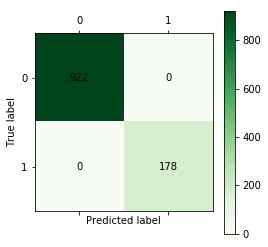

ValueError: X has 26 features per sample; expecting 31

In [146]:
result=simple_logisticRegression(['MonthlyIncome'])

In [93]:
simple_logisticRegression(train.columns)

roc_auc_score for Age,Attrition,DistanceFromHome,Education,EducationField,EmployeeNumber,EnvironmentSatisfaction,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Gender#0,Gender#1,BusinessTravel#0,BusinessTravel#1,BusinessTravel#2,Department#0,Department#1,Department#2 is 1.0


In [147]:
train.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome',
       'Education', 'EducationField', 'EmployeeNumber',
       'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
       'JobRole', 'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [126]:
test.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')